In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42)

In [43]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]], shape=(1000, 2))

In [44]:
y

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2,

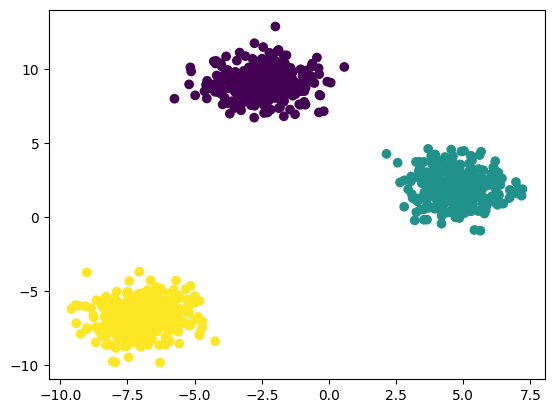

In [45]:
plt.scatter(X[:,0],X[:,1],c=y)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [48]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmean=KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train_scaled)
    wcss.append(kmean.inertia_)

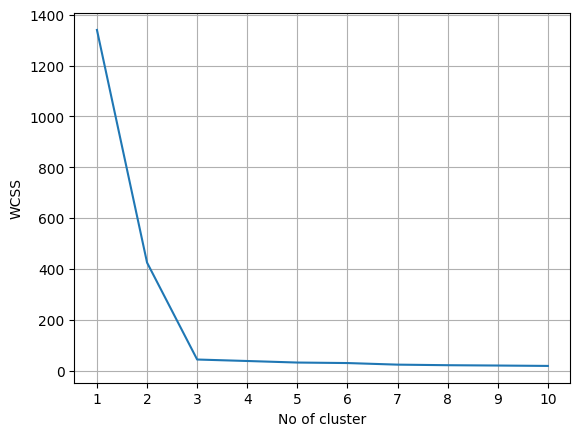

In [49]:
# rplot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No of cluster")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [50]:
kmean=KMeans(n_clusters=3,init="k-means++")
kmean.fit(X_train_scaled)
y_pred=kmean.predict(X_test)


In [51]:
y_pred

array([2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1,
       0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1,
       2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1,
       0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1,
       2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0,

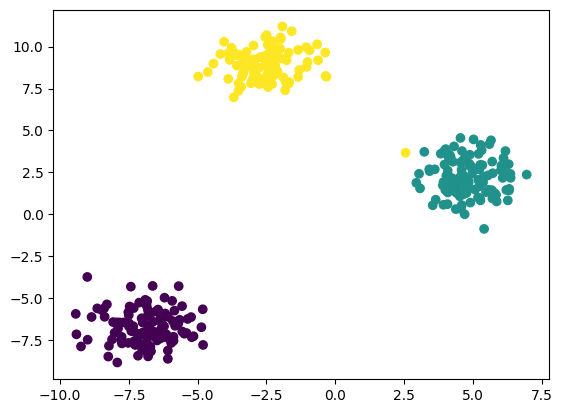

In [52]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
# validating the k value 

In [30]:
pip install kneed

  Using cached kneed-0.8.5-py3-none-any.whl.metadata (5.5 kB)
Using cached kneed-0.8.5-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [53]:
from kneed import KneeLocator
K1=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
K1.elbow

np.int64(3)

In [54]:
from sklearn.metrics import silhouette_score
sil_coeff=[]
for k in range(2,11):
    kean=KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmean.labels_)
    sil_coeff.append(score)

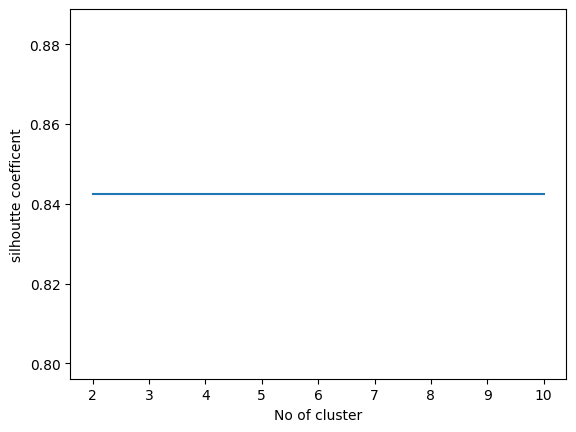

In [55]:
plt.plot(range(2,11),sil_coeff)
plt.xticks(range(2,11))
plt.xlabel("No of cluster")
plt.ylabel("silhoutte coefficent")
plt.show()